In [1]:
import numpy as np
import pandas as pd

## Data

In [2]:
df = pd.read_csv("00-1-shipman-confirmed-victims-x.csv")

df.head()

DateofDeath                   Name  Age PlaceofDeath          Decision  \
0   17-Mar-75              Eva Lyons   70     Own home  Unlawful killing   
1   07-Aug-78  Sarah Hannah Marsland   86     Own home  Unlawful killing   
2   30-Aug-78      Mary Ellen Jordan   73     Own home  Unlawful killing   
3   07-Dec-78        Harold Bramwell   73     Own home  Unlawful killing   
4   20-Dec-78         Annie Campbell   88     Own home  Unlawful killing   

   yearOfDeath  gender  fractionalDeathYear ageBracket gender2  
0         1975       0              1974.71      70-74   Women  
1         1978       0              1978.10      85-89   Women  
2         1978       0              1978.16      70-74   Women  
3         1978       1              1978.44      70-74     Men  
4         1978       0              1978.47      85-89   Women

## With plotly

In [3]:
import plotly.graph_objects as go
import plotly.express as px

In [50]:
fig = px.scatter(
    df, 
    x="fractionalDeathYear", 
    y="Age", 
    color="gender2", 
    color_discrete_sequence=px.colors.qualitative.Set1,
    marginal_x="histogram", 
    marginal_y="histogram",
)

fig.update_layout(
    autosize=False,
    width=800,
    height=600,
    yaxis_title="Age of victim", 
    xaxis_title="Year of Death", 
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0., # gap between bars of the same location coordinates,
    legend=dict(
        yanchor="top",
        y=1,
        xanchor="left",
        x=0,
        bordercolor="Black",
        borderwidth=1,
        title_text=""
    )
)


fig

In [6]:
px.pie(df, names=df.gender2.unique(), values=df.gender2.value_counts(), color_discrete_sequence=px.colors.qualitative.Set1)

## With plotnine

In [9]:
from plotnine import *

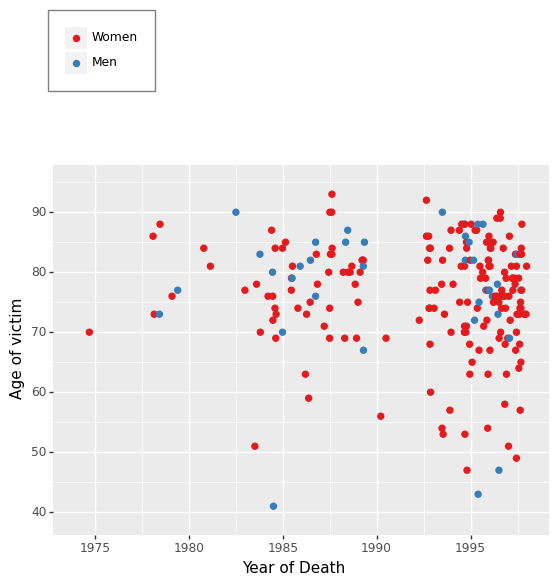

<ggplot: (-9223371903811438416)>

In [51]:
s = ggplot(df, aes(x="fractionalDeathYear", y="Age", colour="reorder(gender2, gender)")) # initialise plot for the scatter-chart
s += geom_point(size=2) # assign scatter chart-type with size 2 points
s += labs(x="Year of Death", y="Age of victim") # Adds axis labels  
s += scale_x_continuous(breaks=range(1975, 1996, 5), limits=[1974,1998]) #x-axis labels every 5 years and between 74 and 98 
s += scale_y_continuous(breaks=range(40, 91, 10), limits=[39,95]) # y-axis every 10 years and between 39 and 95
#s += scale_size_continuous(name="Size", guide=False)  # turns off size legend
s += scale_color_brewer(type="qual", palette="Set1") # sets the colour palette 
s += theme(legend_position=(0.2,1.12), legend_background=element_rect(color="grey"), legend_title=element_blank()) # positions. borders, and un-titles the legend

s


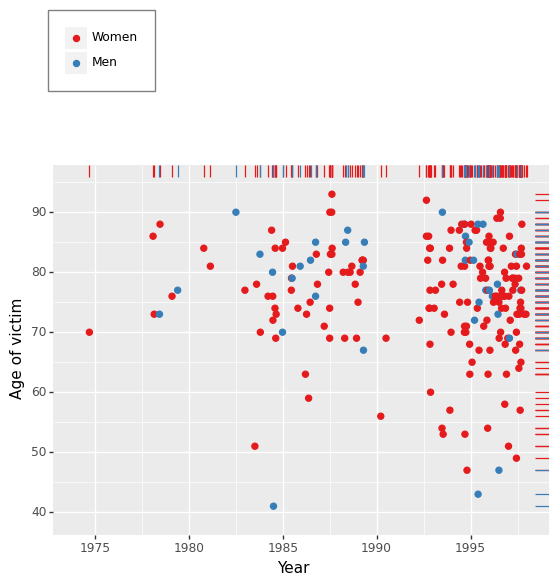

<ggplot: (-9223371903828743552)>

In [11]:
s += geom_rug(sides="tr", show_legend=False)

s

## With seaborn

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", context="notebook")
sns.set_palette("Set1")

<Figure size 576x432 with 0 Axes>

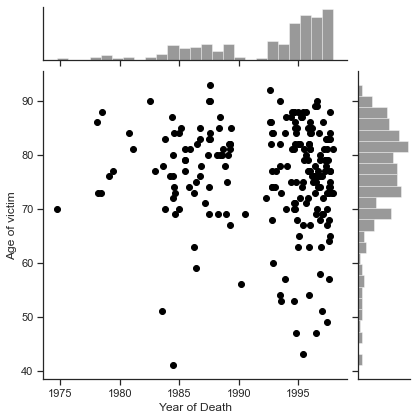

In [57]:
plt.figure(figsize=(8, 6))

#g = sns.scatterplot(data=df, x="fractionalDeathYear", y="Age", hue="gender2")
g = sns.jointplot(data=df, x="fractionalDeathYear", y="Age", marginal_kws=dict(bins=25), color="black")

g.set_axis_labels("Year of Death", "Age of victim")


sns.despine(left=False, bottom=False)